#### Product Sales by Country
The dataset contains sales information for a company over a period of time. It seems to track sales across different customer segments (retail, wholesale etc.), countries, and products. It includes details about the units sold, discount band(whether low, medium, high or no discount at all), and both manufacturing and sale prices. This allows for calculation of profit and cost of goods sold (COGS). With 700 rows, the dataset provides a substantial amount of data for analysis. Overall, this dataset seems to be a rich resource for understanding sales performance across various product lines, customer segments, and geographic regions. By analyzing this data, one can identify trends, target specific markets, and optimize pricing strategies.The breakdown of metrics is in 3 parts:

Sales Performance Metrics: The dataset includes columns for units sold, discount offered, sale price, manufacturing price, and cost of goods sold (COGS). These metrics can be used to calculate revenue, profit margin, and other profitability measures.  

Product and Customer Segmentation: The data includes information about product, segment (e.g., government, small business), and country. This segmentation allows for analysis of sales performance by product line, customer type, and geographic location.  

Time Dimension: The dataset includes month name and year, enabling analysis of sales trends over time.

#### Aim of the analysis

1. Growth assessment: Identify the year-on-year growth rate of the company
2. Identify top-selling products: Analyze which products consistently generate the highest sales revenue and profit.
3. Assessing product profit performance:  Compare profits across the different products
4. Assess segment performance:  Compare sales performance (units sold, revenue, profit) across different segments (government, small business, etc.).
5. Identify potential country markets: Analyze which countries consistently generate the highest sales revenue and profit.
6. Analyze sales trends:  Uncover trends in unit sales, revenue, or profit over time (monthly, yearly).
#### Issues in this dataset include:
missing values, inconsistent formatting, and other errors that need to be addressed.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the csv file
country_sales = pd.read_csv("Country Product Sales Final.csv")

In [3]:
#Looking at the first 10 rows
country_sales.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Cost of goods sold,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1619.0,3.0,20.0,32380.0,16185.0,16195.0,1/1/2019,1.0,Jan,2019.0
1,Government,GERMANY,Carretera,NaN,1321.0,3.0,20.0,26420.0,13210.0,13210.0,1/1/2019,1.0,Jan,2019.0
2,Midmarket,France,Carretera,NaN,2178.0,3.0,15.0,32670.0,21780.0,10890.0,6/1/2019,6.0,Jun,2019.0
3,Midmarket,GERMANY,Carretera,NaN,888.0,3.0,15.0,13320.0,8880.0,4440.0,6/1/2019,6.0,Jun,2019.0
4,Midmarket,Mexico,Carretera,NaN,2470.0,3.0,15.0,37050.0,24700.0,12350.0,6/1/2019,6.0,Jun,2019.0
5,Government,GERMANY,Carretera,NaN,1513.0,3.0,350.0,529550.0,393380.0,136170.0,12/1/2019,12.0,Dec,2019.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Midmarket,GERMANY,Montana,NaN,921.0,5.0,15.0,13815.0,9210.0,4605.0,3/1/2019,3.0,Mar,2019.0
8,Channel Partners,Canada,Montana,NaN,2518.0,5.0,12.0,30216.0,7554.0,22662.0,6/1/2019,6.0,Jun,2019.0
9,Government,France,Montana,NaN,1899.0,5.0,20.0,37980.0,18990.0,18990.0,6/1/2019,6.0,Jun,2019.0


In [6]:
#Looking at the last 10 rows
country_sales.tail(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Cost of goods sold,Profit,Date,Month Number,Month Name,Year
700,Government,USA,VTT,High,267.0,250.0,20.0,5340.0,2670.0,2670.0,10/1/2018,10.0,Oct,2018.0
701,Midmarket,GERMANY,VTT,High,1175.0,250.0,15.0,17625.0,11750.0,5875.0,10/1/2019,10.0,Oct,2019.0
702,Enterprise,Canada,VTT,High,2954.0,250.0,125.0,369250.0,354480.0,14770.0,11/1/2018,11.0,Nov,2018.0
703,Enterprise,GERMANY,VTT,High,552.0,250.0,125.0,69000.0,66240.0,2760.0,11/1/2019,11.0,Nov,2019.0
704,Government,France,VTT,High,293.0,250.0,20.0,5860.0,2930.0,2930.0,12/1/2019,12.0,Dec,2019.0
705,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,618750.0,123750.0,3/1/2019,3.0,Mar,2019.0
706,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,136500.0,27300.0,10/1/2019,10.0,Oct,2019.0
707,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,6840.0,2736.0,2/1/2019,2.0,Feb,2019.0
708,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,3615.0,1446.0,4/1/2019,4.0,Apr,2019.0
709,Channel Partners,USA,VTT,High,1806.0,250.0,12.0,21672.0,5418.0,16254.0,5/1/2019,5.0,May,2019.0


In [7]:
#Display the number of duplicate data
country_sales.duplicated().sum()

9

In [8]:
#displaying the actual duplicates
country_sales[country_sales.duplicated()]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Cost of goods sold,Profit,Date,Month Number,Month Name,Year
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Government,Canada,Paseo,NaN,1817.0,10.0,20.0,36340.0,18170.0,18170.0,12/1/2019,12.0,Dec,2019.0
38,Enterprise,France,Velo,NaN,1804.0,120.0,125.0,225500.0,216480.0,9020.0,2/1/2019,2.0,Feb,2019.0
45,Small Business,Canada,VTT,NaN,2001.0,250.0,300.0,600300.0,500250.0,100050.0,2/1/2019,2.0,Feb,2019.0
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Small Business,Mexico,Carretera,Low,494.0,3.0,300.0,148200.0,123500.0,24700.0,10/1/2018,10.0,Oct,2018.0
80,Government,France,Montana,Low,1376.0,5.0,20.0,27520.0,13755.0,13765.0,7/1/2019,7.0,Jul,2019.0


In [9]:
#Checking to see the row numbers before duplicates are deleted

country_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              705 non-null    object 
 1   Country              705 non-null    object 
 2   Product              705 non-null    object 
 3   Discount Band        649 non-null    object 
 4   Units Sold           705 non-null    float64
 5   Manufacturing Price  705 non-null    float64
 6   Sale Price           705 non-null    float64
 7   Gross Sales          705 non-null    float64
 8   Cost of goods sold   705 non-null    float64
 9   Profit               705 non-null    float64
 10  Date                 705 non-null    object 
 11  Month Number         705 non-null    float64
 12  Month Name           705 non-null    object 
 13  Year                 705 non-null    float64
dtypes: float64(8), object(6)
memory usage: 77.8+ KB


In [10]:
# Removing duplicates and checking the number of rows left, after deleting the duplicates
country_sales.drop_duplicates(inplace=True)
country_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 709
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        647 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Cost of goods sold   700 non-null    float64
 9   Profit               700 non-null    float64
 10  Date                 700 non-null    object 
 11  Month Number         700 non-null    float64
 12  Month Name           700 non-null    object 
 13  Year                 700 non-null    float64
dtypes: float64(8), object(6)
memory usage: 82.1+ KB


##### After deleting the duplicates, the dataset which had 710 rows now has 701 rows. This means 9 duplicate rows were deleted.

In [11]:
#Renaming some of the columns and checking to see if it has been renamed
country_sales.rename(columns={"Manufacturing Price": "Manufacturing_Price($)",
            "Sale Price":"Sales_Price($)",
            "Gross Sales":"Gross_Sales($)",
            "Cost of goods sold":"Cost_of_goods_sold($)",
             "Profit":"Profit($)",
             },
            inplace=True)

country_sales.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing_Price($),Sales_Price($),Gross_Sales($),Cost_of_goods_sold($),Profit($),Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1619.0,3.0,20.0,32380.0,16185.0,16195.0,1/1/2019,1.0,Jan,2019.0
1,Government,GERMANY,Carretera,NaN,1321.0,3.0,20.0,26420.0,13210.0,13210.0,1/1/2019,1.0,Jan,2019.0
2,Midmarket,France,Carretera,NaN,2178.0,3.0,15.0,32670.0,21780.0,10890.0,6/1/2019,6.0,Jun,2019.0
3,Midmarket,GERMANY,Carretera,NaN,888.0,3.0,15.0,13320.0,8880.0,4440.0,6/1/2019,6.0,Jun,2019.0
4,Midmarket,Mexico,Carretera,NaN,2470.0,3.0,15.0,37050.0,24700.0,12350.0,6/1/2019,6.0,Jun,2019.0
5,Government,GERMANY,Carretera,NaN,1513.0,3.0,350.0,529550.0,393380.0,136170.0,12/1/2019,12.0,Dec,2019.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Midmarket,GERMANY,Montana,NaN,921.0,5.0,15.0,13815.0,9210.0,4605.0,3/1/2019,3.0,Mar,2019.0
8,Channel Partners,Canada,Montana,NaN,2518.0,5.0,12.0,30216.0,7554.0,22662.0,6/1/2019,6.0,Jun,2019.0
9,Government,France,Montana,NaN,1899.0,5.0,20.0,37980.0,18990.0,18990.0,6/1/2019,6.0,Jun,2019.0


In [12]:
#Checking the dataset to see the number of rows before deleting any blank rows

country_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 709
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Segment                 700 non-null    object 
 1   Country                 700 non-null    object 
 2   Product                 700 non-null    object 
 3   Discount Band           647 non-null    object 
 4   Units Sold              700 non-null    float64
 5   Manufacturing_Price($)  700 non-null    float64
 6   Sales_Price($)          700 non-null    float64
 7   Gross_Sales($)          700 non-null    float64
 8   Cost_of_goods_sold($)   700 non-null    float64
 9   Profit($)               700 non-null    float64
 10  Date                    700 non-null    object 
 11  Month Number            700 non-null    float64
 12  Month Name              700 non-null    object 
 13  Year                    700 non-null    float64
dtypes: float64(8), object(6)
memory usage: 82.1+ KB

In [13]:
#Removing any blank rows from the dataset and checking the number of rows

country_sales.dropna(inplace=True)
country_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647 entries, 61 to 709
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Segment                 647 non-null    object 
 1   Country                 647 non-null    object 
 2   Product                 647 non-null    object 
 3   Discount Band           647 non-null    object 
 4   Units Sold              647 non-null    float64
 5   Manufacturing_Price($)  647 non-null    float64
 6   Sales_Price($)          647 non-null    float64
 7   Gross_Sales($)          647 non-null    float64
 8   Cost_of_goods_sold($)   647 non-null    float64
 9   Profit($)               647 non-null    float64
 10  Date                    647 non-null    object 
 11  Month Number            647 non-null    float64
 12  Month Name              647 non-null    object 
 13  Year                    647 non-null    float64
dtypes: float64(8), object(6)
memory usage: 75.8+ K

#### After deleting the blank rows, the dataset which had 701 rows now has 647 rows. This means 54 blank rows were deleted.

In [14]:
# Changing the "Units Sold", "Month Number", "Year" and "Cost_of_goods_sold" to integer
country_sales = country_sales.astype({'Units Sold':int, 'Month Number': int, 'Year': int, 'Cost_of_goods_sold($)': int})


In [15]:
# Changing "Manufacturing_Price", "Sales_Price", "Gross_Sales" and "Profit" to integer
country_sales = country_sales.astype({'Manufacturing_Price($)': int, 'Sales_Price($)': int, 'Gross_Sales($)':int, 'Profit($)': int})


In [16]:
#first 10 rows
country_sales.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing_Price($),Sales_Price($),Gross_Sales($),Cost_of_goods_sold($),Profit($),Date,Month Number,Month Name,Year
61,Government,France,Paseo,Low,3945,10,7,27615,19725,7890,1/1/2019,1,Jan,2019
62,Midmarket,France,Paseo,Low,2296,10,15,34440,22960,11480,2/1/2019,2,Feb,2019
63,Government,France,Paseo,Low,1030,10,7,7210,5150,2060,5/1/2019,5,May,2019
64,Government,France,Velo,Low,639,120,7,4473,3195,1278,11/1/2019,11,Nov,2019
65,Government,Canada,VTT,Low,1326,250,7,9282,6630,2652,3/1/2019,3,Mar,2019
66,Channel Partners,USA,Carretera,Low,1858,3,12,22296,5574,16722,2/1/2019,2,Feb,2019
67,Government,Mexico,Carretera,Low,1210,3,350,423500,314600,108900,3/1/2019,3,Mar,2019
68,Government,USA,Carretera,Low,2529,3,7,17703,12645,5058,7/1/2019,7,Jul,2019
69,Channel Partners,Canada,Carretera,Low,1445,3,12,17340,4335,13005,9/1/2019,9,Sep,2019
70,Enterprise,USA,Carretera,Low,330,3,125,41250,39600,1650,9/1/2018,9,Sep,2018


In [17]:
# displaying the number of rows and columns
country_sales.shape

(647, 14)

In [18]:
country_sales.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing_Price($),Sales_Price($),Gross_Sales($),Cost_of_goods_sold($),Profit($),Date,Month Number,Month Name,Year
61,Government,France,Paseo,Low,3945,10,7,27615,19725,7890,1/1/2019,1,Jan,2019
62,Midmarket,France,Paseo,Low,2296,10,15,34440,22960,11480,2/1/2019,2,Feb,2019
63,Government,France,Paseo,Low,1030,10,7,7210,5150,2060,5/1/2019,5,May,2019
64,Government,France,Velo,Low,639,120,7,4473,3195,1278,11/1/2019,11,Nov,2019
65,Government,Canada,VTT,Low,1326,250,7,9282,6630,2652,3/1/2019,3,Mar,2019


In [19]:
#Checking the datatypes of the columns

country_sales.dtypes

Segment                   object
Country                   object
Product                   object
Discount Band             object
Units Sold                 int32
Manufacturing_Price($)     int32
Sales_Price($)             int32
Gross_Sales($)             int32
Cost_of_goods_sold($)      int32
Profit($)                  int32
Date                      object
Month Number               int32
Month Name                object
Year                       int32
dtype: object

In [20]:
country_sales.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing_Price($),Sales_Price($),Gross_Sales($),Cost_of_goods_sold($),Profit($),Date,Month Number,Month Name,Year
61,Government,France,Paseo,Low,3945,10,7,27615,19725,7890,1/1/2019,1,Jan,2019
62,Midmarket,France,Paseo,Low,2296,10,15,34440,22960,11480,2/1/2019,2,Feb,2019
63,Government,France,Paseo,Low,1030,10,7,7210,5150,2060,5/1/2019,5,May,2019
64,Government,France,Velo,Low,639,120,7,4473,3195,1278,11/1/2019,11,Nov,2019
65,Government,Canada,VTT,Low,1326,250,7,9282,6630,2652,3/1/2019,3,Mar,2019


In [21]:
country_sales["Year"]

61     2019
62     2019
63     2019
64     2019
65     2019
       ... 
705    2019
706    2019
707    2019
708    2019
709    2019
Name: Year, Length: 647, dtype: int32

## Visualizations

### 1. Identifying year-on-year growth of the company.

Year 2018:
Total Revenue: 27048478
Total Profit: 5666753

Year 2019:
Total Revenue: 92941672
Total Profit: 18697944


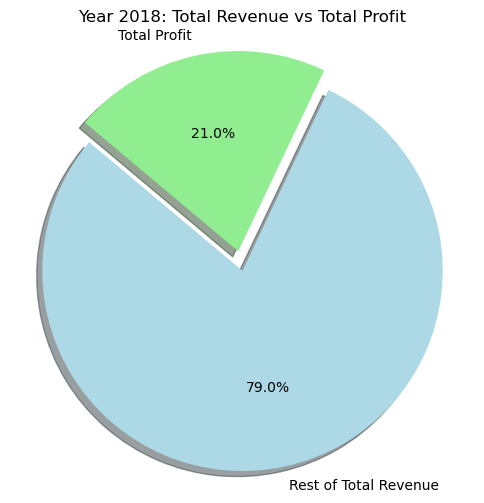

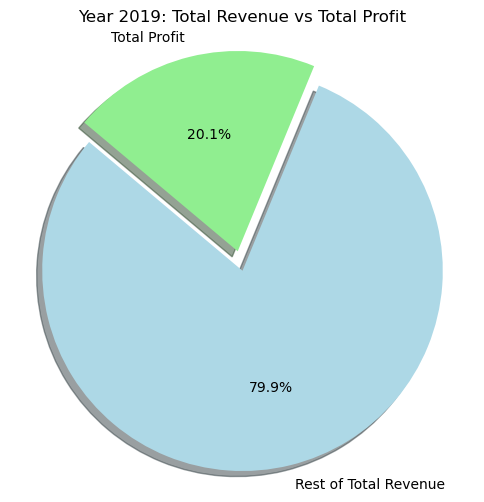

In [24]:
# Filter data by year
year_2018 = country_sales[country_sales['Year'] == 2018]
year_2019 = country_sales[country_sales['Year'] == 2019]

# Calculate total revenue and profit for each year
total_revenue_2018 = year_2018['Gross_Sales($)'].sum()
total_profit_2018 = year_2018['Profit($)'].sum()

total_revenue_2019 = year_2019['Gross_Sales($)'].sum()
total_profit_2019 = year_2019['Profit($)'].sum()

# Print the desired values
print("Year 2018:")
print("Total Revenue:", total_revenue_2018)
print("Total Profit:", total_profit_2018)

print("\nYear 2019:")
print("Total Revenue:", total_revenue_2019)
print("Total Profit:", total_profit_2019)

def create_pie_chart(year, total_revenue, total_profit):
  
  labels = ['Rest of Total Revenue', 'Total Profit']
  colors = ['lightblue', 'lightgreen']
  explode = (0.1, 0)  # Explode 1st slice

  # Calculate pie chart slice sizes
  sizes = [total_revenue - total_profit, total_profit]

    
  plt.figure(figsize=(6, 6))  # Set figure size for each chart
  plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
  plt.title(f'Year {year}: Total Revenue vs Total Profit')
  plt.axis('equal')
  plt.show()

# Create pie charts for 2018 and 2019
create_pie_chart(2018, total_revenue_2018, total_profit_2018)
create_pie_chart(2019, total_revenue_2019, total_profit_2019)

In the year 2018, the total revenue was 28,708,987 dollars while revenue accounted for 6,048,696 dollars (21.0%) of revenue. In 2019, the total revenue
expanded to 100,262,812 dollars while the total profit accounted for 20,218,300 dollars (20.1%) of revenue. This tells us while revenue and profit have 
nominally increased from 2018 to 2019, the profit margin has slightly reduced. The company should look at reducing the cost of some of its goods to 
avoid further reduction in profit margins in the ensuing years.

#### 2. Assessing product revenue and profit performance:  Compare revenue and profits across the different products

In [73]:
1. Growth assessment: Identify the year-on-year growth rate of the company
2. Identify top-selling products: Analyze which products consistently generate the highest sales revenue and profit.
3. Identify potential country markets: Analyze which countries consistently generate the highest sales profit.
4. Assess segment performance:  Compare sales performance (units sold, revenue, profit) across different segments (government, small business, etc.).
6. Analyze sales trends:  Uncover trends in unit sales, revenue, or profit over time (monthly, yearly).
7. Evaluate geographic performance: Analyze sales performance (units sold, revenue, profit) by country to identify strong and weak markets.
8. Impact of discounts:  Determine how discounts affect unit sales, revenue, and profit margins.
9. Profitability analysis:  Calculate profit margins for different products, segments, and countries to identify the most profitable areas.
10. Customer acquisition cost analysis: If customer-level data is included,  analyze customer acquisition costs by segment or country.
11. Forecast future sales:  Based on historical data,  use statistical methods to forecast future sales for products, segments, or regions.

SyntaxError: invalid syntax (1434449250.py, line 1)

Total Profit AND Revenue per Product: 
           Gross_Sales($)  Profit($)
Product                             
Amarilla         17431293    3771187
Carretera        14266348    2755980
Montana          15724959    3131641
Paseo            33696225    6887038
VTT              20072662    4087712
Velo             18798663    3731139


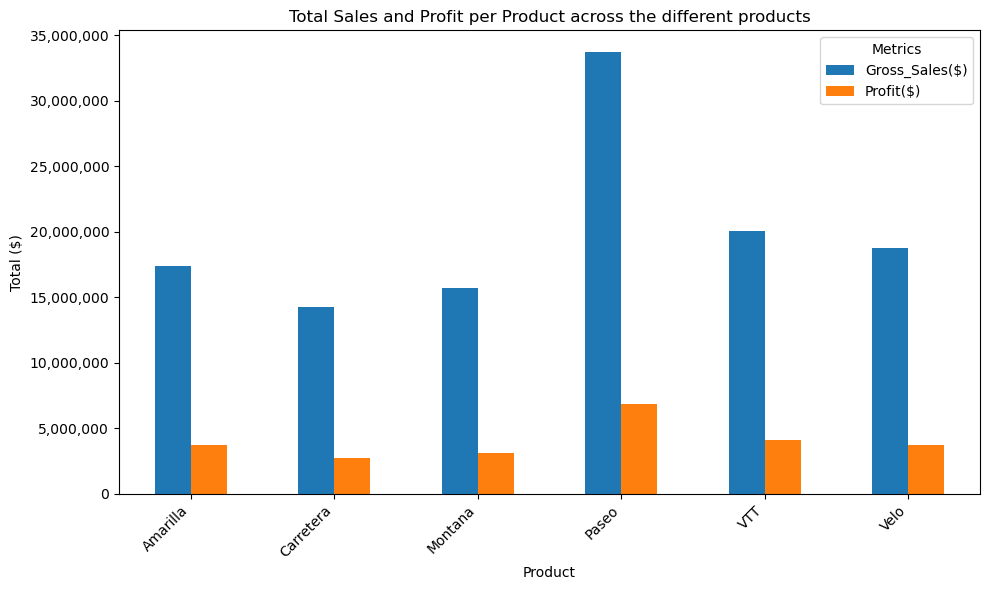

In [27]:
product_totals = country_sales.groupby('Product')[['Gross_Sales($)', 'Profit($)']].sum()

# Create the bar chart with data labels
fig, ax = plt.subplots(figsize=(10, 6))
product_totals.plot(kind='bar', stacked=False, ax=ax)

# Format y-axis labels to remove decimals (assuming integer values)
plt.gca().yaxis.set_major_formatter('{x:,.0f}')  # '{x:,.0f}' for comma separators

plt.xlabel('Product')
plt.ylabel('Total ($)')
plt.title('Total Sales and Profit per Product across the different products')
plt.legend(title='Metrics')

# Print total revenue and profit per product
print("Total Profit AND Revenue per Product: ")
print(product_totals)

# Remove the y-axis (optional, based on your preference)
# plt.gca().yaxis.set_visible(False)

plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()


#### 3. Identify potential country markets: Analyze which countries generate the highest sales revenue and profit.

Total Profit per Country (2018):
Country
   Canada    1013709
France       1119245
GERMANY      1520749
Mexico        949750
USA          1063300
Name: Profit($), dtype: int32

Total Profit per Country (2019):
Country
   Canada    4177348
France       3825947
GERMANY      2990936
Mexico       3601374
USA          4102339
Name: Profit($), dtype: int32


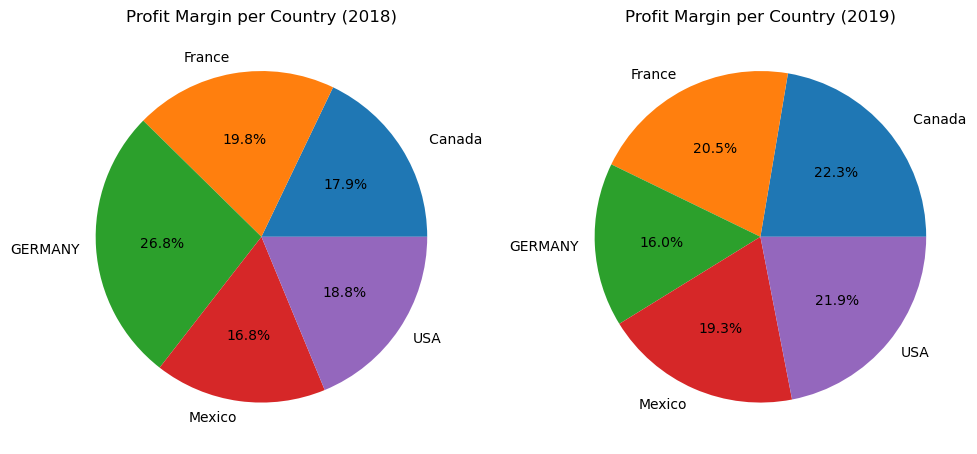

In [28]:
# Filter data for years 2018 and 2019
country_2018 = country_sales[country_sales['Year'] == 2018]
country_2019 = country_sales[country_sales['Year'] == 2019]

# Calculate total profit per country for each year
profit_per_country_2018 = country_2018.groupby('Country')['Profit($)'].sum()
profit_per_country_2019 = country_2019.groupby('Country')['Profit($)'].sum()

# Create subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Create pie charts for each year
ax1.pie(profit_per_country_2018, labels=profit_per_country_2018.index, autopct="%1.1f%%")
ax1.set_title('Profit Margin per Country (2018)')
ax2.pie(profit_per_country_2019, labels=profit_per_country_2019.index, autopct="%1.1f%%")
ax2.set_title('Profit Margin per Country (2019)')

# Print total profit per country for each year
print("Total Profit per Country (2018):")
print(profit_per_country_2018)
print("\nTotal Profit per Country (2019):")
print(profit_per_country_2019)

# Adjust layout for side-by-side charts
plt.tight_layout()

plt.show()


In [29]:
country_sales["Year"]

61     2019
62     2019
63     2019
64     2019
65     2019
       ... 
705    2019
706    2019
707    2019
708    2019
709    2019
Name: Year, Length: 647, dtype: int32

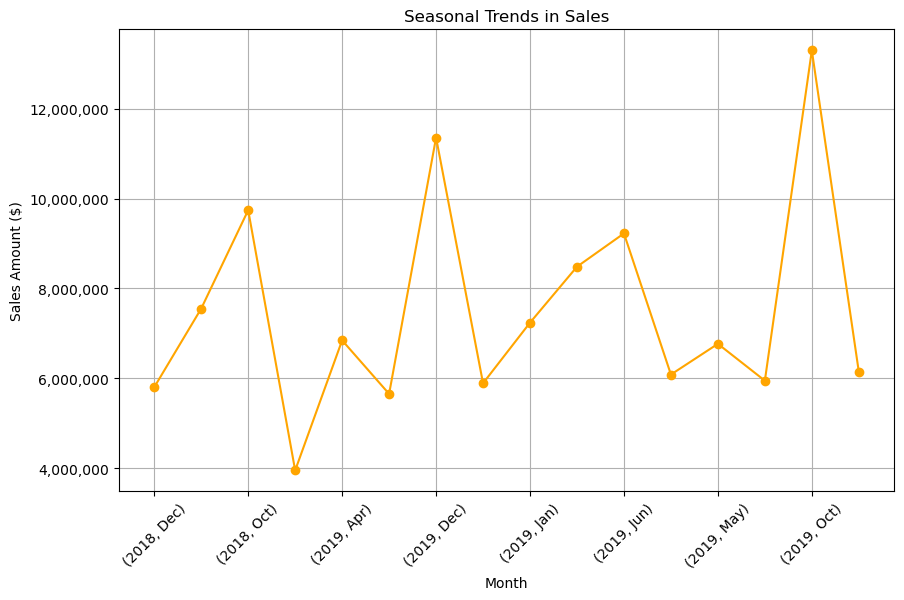

In [49]:
# Group data by year and month and calculate total sales for each month
monthly_sales = country_sales.groupby(['Year','Month Name'],level=None, as_index=True, sort=True, group_keys=True, dropna=True)['Gross_Sales($)'].sum()

# Plot the line chart with formatted y-axis labels
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Seasonal Trends in Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')

# Format y-axis labels to remove decimals (assuming integer values)
plt.gca().yaxis.set_major_formatter('{x:,.0f}')  # Use '{x:,.0f}' for comma separators

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [39]:
country_sales.dtypes

Segment                   object
Country                   object
Product                   object
Discount Band             object
Units Sold                 int32
Manufacturing_Price($)     int32
Sales_Price($)             int32
Gross_Sales($)             int32
Cost_of_goods_sold($)      int32
Profit($)                  int32
Date                      object
Month Number               int32
Month Name                object
Year                       int32
dtype: object

C:\Users\aaddai022\AppData\Local\Temp\ipykernel_8984\2796975591.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segment_sales_profit = data.groupby('Segment')['Gross Sales', 'Profit'].sum()


<Figure size 1000x600 with 0 Axes>

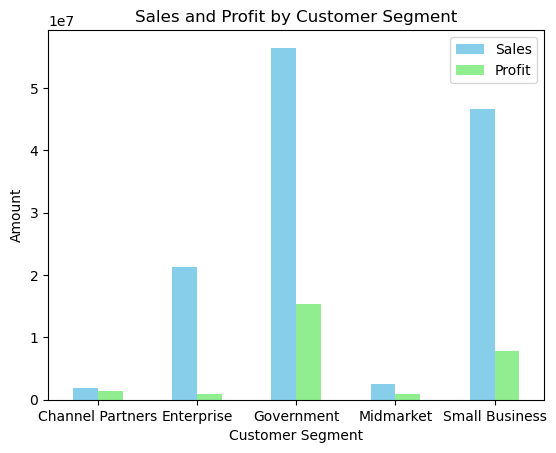

In [98]:
# Group data by customer segment and calculate total sales and profit for each segment
segment_sales_profit = data.groupby('Segment')['Gross Sales', 'Profit'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
segment_sales_profit.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Sales and Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['Sales', 'Profit'])
plt.show()


In [44]:
# Calculate total profit and total units sold
total_profit = country_sales['Profit($)'].sum()
total_units_sold = country_sales['Units Sold'].sum()

# Calculate average profit margin per unit sold
average_profit_margin_per_unit_sold = round(total_profit / total_units_sold,2)

print(f"Average Profit Margin per Unit Sold is {average_profit_margin_per_unit_sold}")


Average Profit Margin per Unit Sold is 23.44


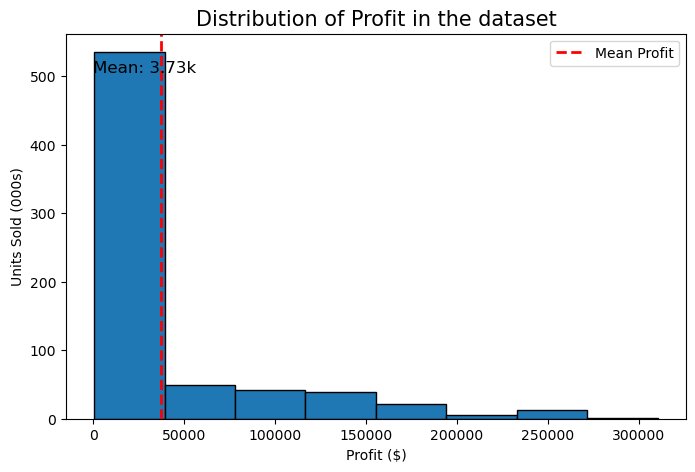

In [139]:
profit = country_sales['Profit']

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(profit, bins=8, edgecolor='black')

# Add labels and title
plt.xlabel('Profit ($)', fontsize=10)
plt.ylabel('Units Sold (000s)', fontsize=10)
plt.title('Distribution of Profit in the dataset', fontsize=15)
plt.grid(False)

# Calculate mean for the dotted line and text annotation
mean_profit = profit.mean()

# Add mean line
plt.axvline(mean_profit, color='red', linestyle='dashed', linewidth=2, label='Mean Profit')
plt.legend()

# Add text annotation for the mean with scaling factor (divide by 10000)
plt.text(mean_profit / 10000 * 1.05, plt.ylim()[1] * 0.9, f'Mean: {(mean_profit / 10000):.2f}k', fontsize=12)

# Display the plot
plt.show()

### Machine Learning

In [83]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [84]:
country_sales.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing_Price($),Sales_Price($),Gross_Sales($),Cost_of_goods_sold($),Profit($),Date,Month Number,Month Name,Year,Profit Category
61,Government,France,Paseo,Low,3945,10,7,27615,19725,7890,1/1/2019,1,Jan,2019,0
62,Midmarket,France,Paseo,Low,2296,10,15,34440,22960,11480,2/1/2019,2,Feb,2019,0
63,Government,France,Paseo,Low,1030,10,7,7210,5150,2060,5/1/2019,5,May,2019,0
64,Government,France,Velo,Low,639,120,7,4473,3195,1278,11/1/2019,11,Nov,2019,0
65,Government,Canada,VTT,Low,1326,250,7,9282,6630,2652,3/1/2019,3,Mar,2019,0
66,Channel Partners,USA,Carretera,Low,1858,3,12,22296,5574,16722,2/1/2019,2,Feb,2019,0
67,Government,Mexico,Carretera,Low,1210,3,350,423500,314600,108900,3/1/2019,3,Mar,2019,1
68,Government,USA,Carretera,Low,2529,3,7,17703,12645,5058,7/1/2019,7,Jul,2019,0
69,Channel Partners,Canada,Carretera,Low,1445,3,12,17340,4335,13005,9/1/2019,9,Sep,2019,0
70,Enterprise,USA,Carretera,Low,330,3,125,41250,39600,1650,9/1/2018,9,Sep,2018,0


In [85]:
country_sales.shape

(646, 15)

In [86]:
# Find maximum profit
max_profit = country_sales['Profit($)'].max()

# Find minimum profit
min_profit = country_sales['Profit($)'].min()

print(f"Maximum value in Profit column: $ {max_profit}")
print(f"Minimum value in Profit column: $ {min_profit}")


Maximum value in Profit column: $ 310500
Minimum value in Profit column: $ 526


In [87]:
# Define thresholds for profit categories (adjusted based on your min and max values)
low_threshold = country_sales['Profit($)'].min() + (country_sales['Profit($)'].max() - country_sales['Profit($)'].min()) / 3
medium_threshold = low_threshold + (country_sales['Profit($)'].max() - country_sales['Profit($)'].min()) / 3

# Create a new column for profit category
country_sales['Profit Category'] = pd.cut(country_sales['Profit($)'], bins=[country_sales['Profit($)'].min(), low_threshold, medium_threshold, country_sales['Profit($)'].max()], labels=[0,1,2])

# Print the DataFrame with the new column
print(country_sales)


              Segment    Country   Product Discount Band  Units Sold  \
61         Government     France     Paseo           Low        3945   
62          Midmarket     France     Paseo           Low        2296   
63         Government     France     Paseo           Low        1030   
64         Government     France      Velo           Low         639   
65         Government     Canada       VTT           Low        1326   
..                ...        ...       ...           ...         ...   
705    Small Business     France  Amarilla          High        2475   
706    Small Business     Mexico  Amarilla          High         546   
707        Government     Mexico   Montana          High        1368   
708        Government     Canada     Paseo          High         723   
709  Channel Partners        USA       VTT          High        1806   

     Manufacturing_Price($)  Sales_Price($)  Gross_Sales($)  \
61                       10               7           27615   
62       

In [88]:
country_sales

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing_Price($),Sales_Price($),Gross_Sales($),Cost_of_goods_sold($),Profit($),Date,Month Number,Month Name,Year,Profit Category
61,Government,France,Paseo,Low,3945,10,7,27615,19725,7890,1/1/2019,1,Jan,2019,0
62,Midmarket,France,Paseo,Low,2296,10,15,34440,22960,11480,2/1/2019,2,Feb,2019,0
63,Government,France,Paseo,Low,1030,10,7,7210,5150,2060,5/1/2019,5,May,2019,0
64,Government,France,Velo,Low,639,120,7,4473,3195,1278,11/1/2019,11,Nov,2019,0
65,Government,Canada,VTT,Low,1326,250,7,9282,6630,2652,3/1/2019,3,Mar,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,Small Business,France,Amarilla,High,2475,260,300,742500,618750,123750,3/1/2019,3,Mar,2019,1
706,Small Business,Mexico,Amarilla,High,546,260,300,163800,136500,27300,10/1/2019,10,Oct,2019,0
707,Government,Mexico,Montana,High,1368,5,7,9576,6840,2736,2/1/2019,2,Feb,2019,0
708,Government,Canada,Paseo,High,723,10,7,5061,3615,1446,4/1/2019,4,Apr,2019,0


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

country_sales = country_sales.dropna()

# Select features and target variable
features = ['Gross_Sales($)', 'Cost_of_goods_sold($)', 'Manufacturing_Price($)' , 'Sales_Price($)']
target = 'Profit Category'

# Split data into training and testing sets with 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(country_sales[features], country_sales[target], test_size=0.25, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (replace with your preferred evaluation metric)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Use the trained model to predict profit category for new data points
# (Replace with your new data point as a list or pandas DataFrame)
new_data = [135872, 5000, 50, 20]  # Example data point
predicted_category = model.predict([new_data])[0]

print(f"Predicted Profit Category: {predicted_category}")


Model Accuracy: 0.99
Predicted Profit Category: 0


E:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [90]:
#checking the error that exist between predicted values and actual values

mse = mean_squared_error(y_test,y_pred)

In [91]:
mse

0.006211180124223602